# Pierwszy własny trening CNN

In [3]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os
import gc

# Wybierz 10 klas

Poniżej przygotuj listę 10 klas z:
https://quickdraw.withgoogle.com/data

> nazwy takie jak nazwy obiektów (wyświetlane po najechaniu lub kliknięciu)

In [4]:
class_names=['ambulance','bulldozer','bus','car','firetruck','helicopter','motorbike','truck','tractor','train']

## Test

In [5]:
assert len(class_names)==10, 'Nazw powinno być dokładnie 10'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Każda z nazw powinna być typu str'
    assert '/' not in class_names[i], 'Same nazwy klas, ze spacjami, bez ukośników'

# Wczytanie danych
Pobieranie plików z obrazami w formaci npy (numpy)

In [6]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

## Wczytywanie z plików .npy
Dane znajdziesz w tablicy data

In [7]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

ambulance       <class 'numpy.ndarray'>
bulldozer       <class 'numpy.ndarray'>
bus             <class 'numpy.ndarray'>
car             <class 'numpy.ndarray'>
firetruck       <class 'numpy.ndarray'>
helicopter      <class 'numpy.ndarray'>
motorbike       <class 'numpy.ndarray'>
truck           <class 'numpy.ndarray'>
tractor         <class 'numpy.ndarray'>
train           <class 'numpy.ndarray'>


# Liczebności i wymiary zdjęć
Wypisz nazwę i shape dla każdej klasy

In [8]:
for i in range(len(class_names)):
     print('%-15s'%class_names[i], data[i].shape)

ambulance       (148004, 784)
bulldozer       (187409, 784)
bus             (166208, 784)
car             (182764, 784)
firetruck       (220695, 784)
helicopter      (159938, 784)
motorbike       (169931, 784)
truck           (131354, 784)
tractor         (116677, 784)
train           (127948, 784)


Poniżej zwizualizuj liczbę zdjęć per klasę:

([<matplotlib.axis.XTick at 0x24a75dadc30>,
 [Text(0.0, 0, 'ambulance'),
  Text(1.0, 0, 'bulldozer'),
  Text(2.0, 0, 'bus'),
  Text(3.0, 0, 'car'),
  Text(4.0, 0, 'firetruck'),
  Text(5.0, 0, 'helicopter'),
  Text(6.0, 0, 'motorbike'),
  Text(7.0, 0, 'truck'),
  Text(8.0, 0, 'tractor'),
  Text(9.0, 0, 'train')])

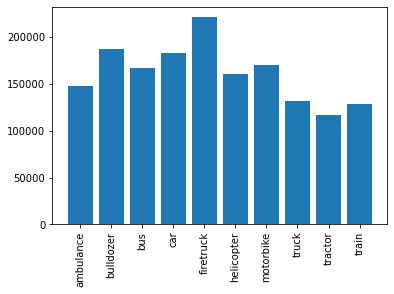

In [9]:
plt.bar(class_names,[len(d) for d in data])
plt.xticks(class_names, class_names, rotation=90) 

# Wizualizacja danych
Dane są w macierzach dwuwyamirowych,
aby je poprawnie wyświetlić jako obraz,
należy je przekonwertować do 3 wymiarów:

- numer zdjęcia
- wysokość
- szerokość

Tu pomoże `reshape` z numpy.

## Konwersja do (-1, 28, 28)

(28, 28) uint8


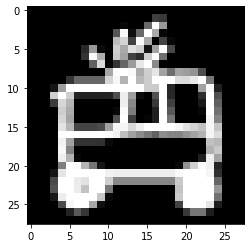

In [10]:
img=np.reshape(data[0][0],(28,28))
print(img.shape,img.dtype)
plt.imshow(img,cmap='gray');

Wyświetl po jednym przykładzie z każdej klasy.

Możesz skorzystać z `plt.subplot`

In [11]:
print(data[0].shape,data[0].dtype)

(148004, 784) uint8


In [12]:
data = [_.reshape(-1,28,28) for _ in data]

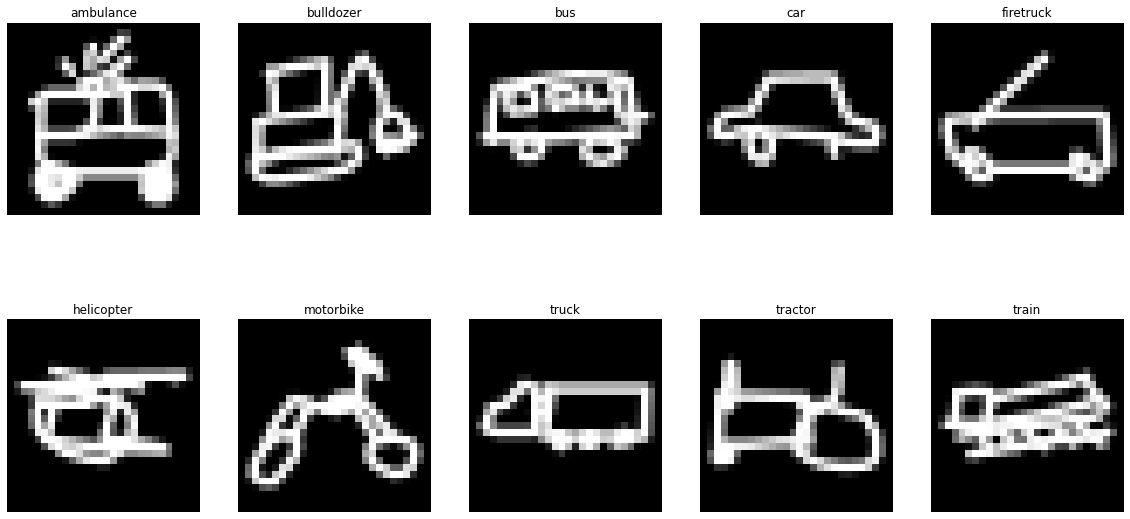

In [13]:
plt.figure(figsize=(20,10))
i=0
for name in class_names:
    plt.subplot(2,5,1+i)
    img=data[i][0]
    plt.title(name)
    plt.imshow(img,cmap='gray',vmin=0, vmax=255)
    plt.axis('off')
    i=i+1

## Obraz średni
Jak podobne do siebie są obrazy z poszczególnych klas?

Oblicz i wyświetl średni obraz dla wszystkich klas.

Możesz skorzystać z `np.mean`

In [14]:
print(data[0].shape)

(148004, 28, 28)


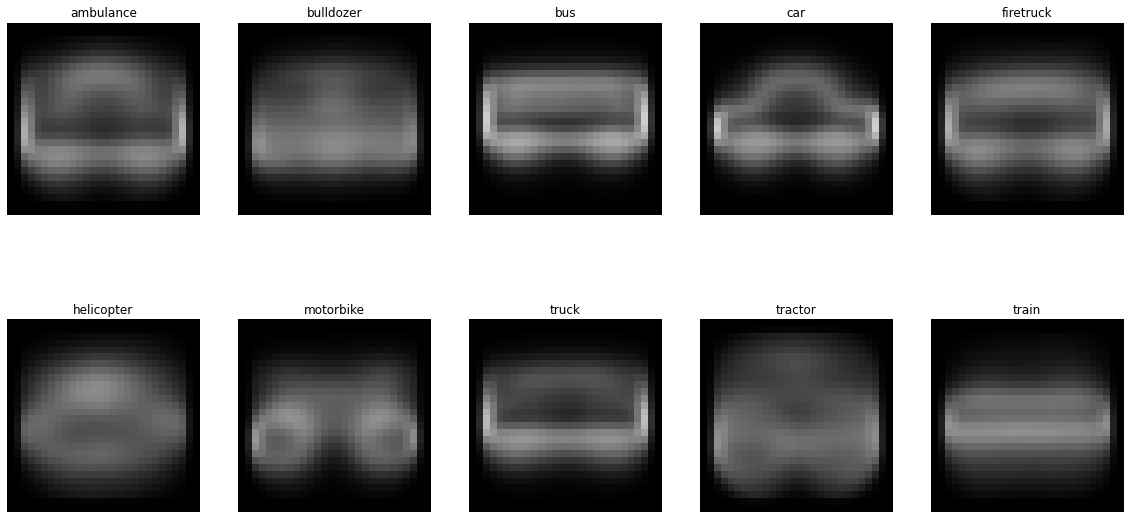

In [15]:
plt.figure(figsize=(20,10))
i=0
for name in class_names:
    plt.subplot(2,5,1+i)
    img=np.mean(data[i], axis=0)
    plt.title(name)
    plt.imshow(img,cmap='gray',vmin=0, vmax=255)
    plt.axis('off')
    i=i+1

# Trening w TensorFlow

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
import tensorflow as tf

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)
    
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Przygotowanie danych
Przygotowanie listy etykiet oraz macierzy zdjęć
Przygotuj:
- [ ] X - jako macierz numpy w której będą wszystkie zdjęcia
- [ ] y - jako macierz numpy w której będą wszystkie etykiety (jako numer klasy)
- [ ] wykonaj reshape dla X do (-1,28,28,1)


In [19]:
X=np.concatenate((data), axis=0)  
print(X.shape)
X=X.reshape(-1,28,28,1)
print(X.shape)

(1610928, 28, 28)
(1610928, 28, 28, 1)


In [20]:
y=[]
for i in range(len(class_names)):
    Label=[i]
    #print(Label)
    elements=data[i].shape[0]
    #print(elements)
    y=y+Label*elements
y=np.array(y)
print(y.shape)
print(y)

(1610928,)
[0 0 0 ... 9 9 9]


## Test

In [21]:
assert type(X)==np.ndarray,                 "X powinno być macierzą numpy"
assert type(y)==np.ndarray,                 "y powinno być macierzą numpy"
assert len(X)==sum([len(_) for _ in data]), "X powinno mieć tyle samo przykładów ile jest w data"
assert len(y)==sum([len(_) for _ in data]), "Y powinno mieć tyle samo etykiet ile jest przykładów w data"
assert len(X.shape)==4,                     "X - Wymagane są 4 wymiary - index, wysokość, szerokość, głębokość"
assert len(y.shape)==1,                     "y - Wymagany jest 1 wymiar"
assert X.shape[1:]==(28,28,1),              "Zdjęcia powinny być 28x28x1"

## Normalizacja

Przygotuj dane (X) w taki sposób by wartości były bliskie zera.
W celu zachowania prostoty - podziel wartości przez 255, a nie przez najwyższą wartość.
Nie przesuwaj średniej do zera, i nie normalizuj odchylenia.

In [22]:
print("X min:",np.min(X))
print("X max:",np.max(X))
X = X / 255
print("After normalization:")
print("X min:",np.min(X))
print("X max:",np.max(X))
print(X.shape)

X min: 0
X max: 255
After normalization:
X min: 0.0
X max: 1.0
(1610928, 28, 28, 1)


### Test

In [23]:
assert np.max(X)<=1, "Największa wartość nie może być większa niż 1"
assert np.min(X)>=0, "Pracujmy w zakresie od 0..1"

## Podział zbioru danych

Podziel zbiór zachowując ten sam stosunek liczby klas w train i val.
Do podziału użyj `train_test_split` z `sklearn`.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, stratify=y) #stratify=y - the same proportion of class in training and validation set
 #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=1)

### Wizualizacja podziału

Przygotuj wykres, który pokaże jak dane train i val sumują się dla poszczególnych klas (trening+val powinny być jako jeden słupek, sumarycznie wysokości słupka przed podziałem). Podpowiedź - stacked bar plot.
Przygotuj drugi wykres, który pokaże czy zbiór danych jest podzielony z zachowaniem stosunku liczebności poszczególnych klas (zachowanie procentowych udziałów klas w zbiorze).

In [26]:
print(y_val.shape)
print(y_train.shape)

(805464,)
(805464,)


In [27]:
print(X_train.shape)
print(X_val.shape)

(805464, 28, 28, 1)
(805464, 28, 28, 1)


In [28]:
train_size=[]
val_size=[]
for i in range(len(class_names)):
    train_size.append(np.sum(y_train == i))
    val_size.append(np.sum(y_val == i))
print(train_size)
print(val_size)

[74002, 93705, 83104, 91382, 110348, 79969, 84965, 65677, 58338, 63974]
[74002, 93704, 83104, 91382, 110347, 79969, 84966, 65677, 58339, 63974]


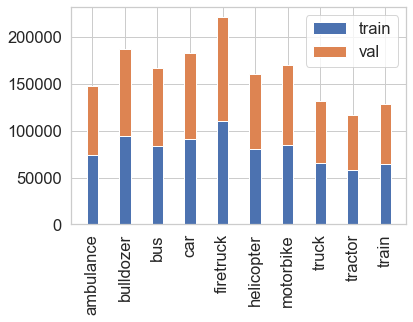

In [29]:
labels = class_names
width = 0.35  
fig, ax = plt.subplots()

ax.bar(labels, train_size, width, label='train')
ax.bar(labels, val_size, width, bottom=train_size, label='val')

plt.xticks(class_names, class_names, rotation=90) 
ax.legend()
plt.show()

In [30]:
class_size=[(len(d)/len(y))*100 for d in data]


Text(0, 0.5, '% udziału klasy w całym zbiorze')

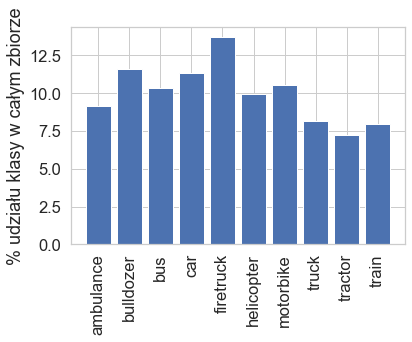

In [31]:
plt.bar(class_names,class_size)
plt.xticks(class_names, class_names, rotation=90) 
plt.ylabel('% udziału klasy w całym zbiorze')

In [32]:
print("Training   X:",X_train.shape, 'y:', y_train.shape)
print("Validation X:",X_val.shape, 'y:', y_val.shape)
print("X min:",np.min(X_train))
print("X max:",np.max(X_train))

Training   X: (805464, 28, 28, 1) y: (805464,)
Validation X: (805464, 28, 28, 1) y: (805464,)
X min: 0.0
X max: 1.0


## Test podziału danych

In [33]:
assert all((np.unique(y_train, return_counts=True)[1]/len(y_train)).round(2) == (np.unique(y_val, return_counts=True)[1]/len(y_val)).round(2)), "Nierówny podział danych, zadbaj by rozkład w train i val były takie same"

# Przygotuj model

- Wykorzystaj warstwy konwolucyjne (minimum 1), pamiętaj o funkcjach aktywacji
- Wykorzystaj Flatten
- Model powinien mieć:
  - wejście 28,28,1
  - 10 wyjść
  - Adama jako optymalizator
  - sparse CE loss
  - warto dodać accuracy jako metrykę


In [34]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 10)                154890    
                                                                 
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


In [35]:
print(X_val.size)
print(y_val.size)
print(X_train.size)
print(y_train.size)

631483776
805464
631483776
805464


In [36]:
!nvidia-smi

Mon Jul 18 21:47:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.89       Driver Version: 460.89       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P0    N/A /  N/A |    205MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Trening

Wykonaj trening:
- 10 epok
- batch size - wybierz pomiędzy 1 a ile Ci się zmieści na GPU (np. 256)
- z walidacją
- zapisz wynik funkcji model.fit do zmiennej `history`

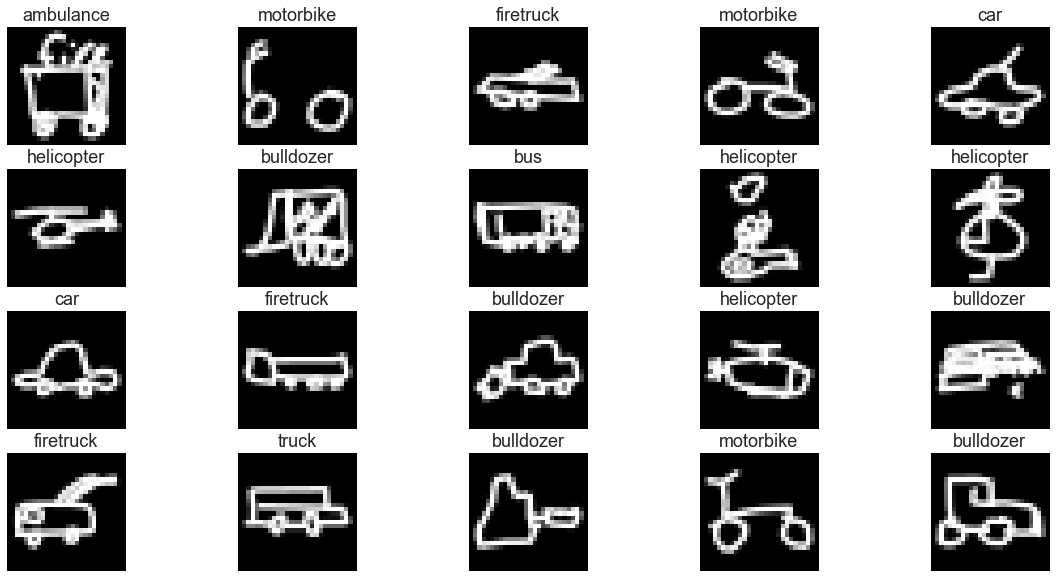

In [37]:
#przykłady ze zbioru treningowego
plt.figure(figsize=(20,10))
i=0
testowy_X=X_train[:20]
testowy_Y=y_train[:20]
for name in testowy_Y:
    plt.subplot(4,5,1+i)
    img=testowy_X[i]
    plt.title(class_names[name])
    plt.imshow(img,cmap='gray',vmin=0, vmax=1)
    plt.axis('off')

    i=i+1

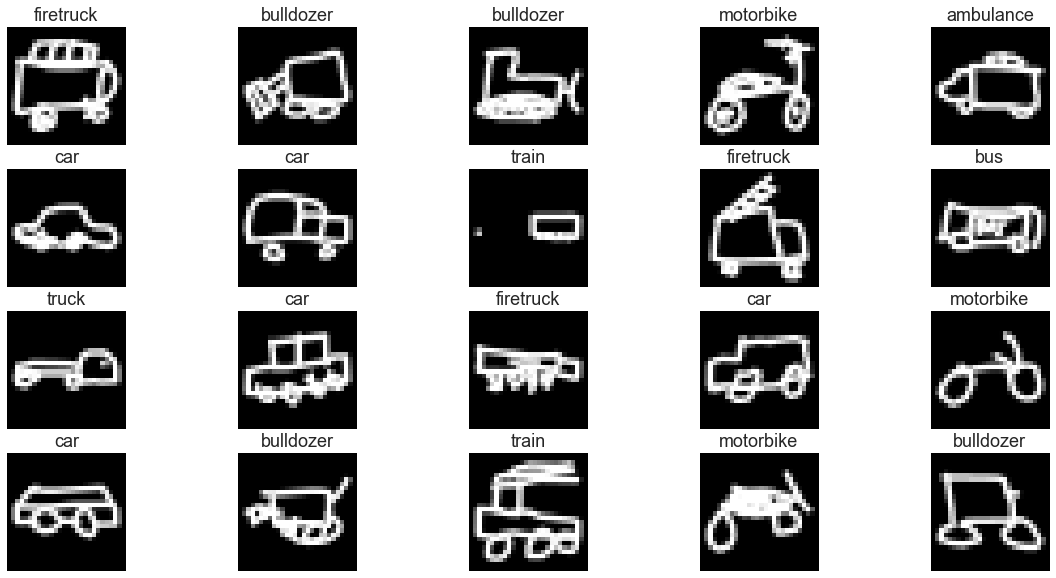

In [38]:
#przykłady ze zbioru walidacyjnego
plt.figure(figsize=(20,10))
i=0
val_testowy_X=X_val[:20]
val_testowy_Y=y_val[:20]
for name in val_testowy_Y:
    plt.subplot(4,5,1+i)
    img=val_testowy_X[i]
    plt.title(class_names[name])
    plt.imshow(img,cmap='gray',vmin=0, vmax=1)
    plt.axis('off')
    i=i+1

In [39]:
epochs=10
batch_size=64
        
history = model.fit(X_train[:40000], y_train[:40000], epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val[:40000],y_val[:40000]),)

Epoch 1/10
625/625 [==============================] - 29s 19ms/step - loss: 1.2419 - accuracy: 0.5884 - val_loss: 1.0513 - val_accuracy: 0.6558
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 0.9355 - accuracy: 0.6916 - val_loss: 0.9555 - val_accuracy: 0.6880
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.8267 - accuracy: 0.7281 - val_loss: 0.9258 - val_accuracy: 0.6963
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 0.7447 - accuracy: 0.7551 - val_loss: 0.9083 - val_accuracy: 0.7061
Epoch 5/10
625/625 [==============================] - 10s 17ms/step - loss: 0.6727 - accuracy: 0.7796 - val_loss: 0.9272 - val_accuracy: 0.7035
Epoch 6/10
625/625 [==============================] - 10s 17ms/step - loss: 0.5951 - accuracy: 0.8019 - val_loss: 0.9706 - val_accuracy: 0.7007
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.5284 - accuracy: 0.8247 - val_loss: 1.0333 - val_accuracy:

In [40]:
!nvidia-smi

Mon Jul 18 21:49:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.89       Driver Version: 460.89       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0    N/A /  N/A |    989MiB /  2048MiB |     45%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Test

In [41]:
assert type(model)==tf.keras.models.Sequential, "Model powinien być tf.keras.models.Sequential"
assert model.compiled_loss is not None, "Skompiluj model"
assert model.loss == 'sparse_categorical_crossentropy', "Użyj jako loss 'sparse_categorical_crossentropy'"
assert model.count_params()>7850, "Zbuduj większy model"
assert all(['linear' not in str(l.activation) for l in model.layers if 'activation' in dir(l)]), 'Gdy nie podasz aktywacji, aktywacją jest funkcja liniowa; użyj ReLU, bądź softmax, odpowiednio'
assert any(['Conv2D' in str(l) for l in model.layers if 'activation' in dir(l)]), 'Użyj konwolucji 2D'
assert list(model.input.shape)==[None,28,28,1], "Wejście do modelu powinno mieć rozmiar None,28,28,1"
assert list(model.output.shape)==[None,10],     "Wyjście z modelu powinno mieć rozmiar None,10"
assert "Adam" in str(model.optimizer), "Użyj adama jako optymalizatora"

In [42]:
assert list(history.history.keys())==['loss', 'accuracy', 'val_loss', 'val_accuracy'], "Trening powinien być z walidacją oraz metryką accuracy"
assert len(history.history['loss'])==10, "Wystarczy 10 epok"

## Wizualizacja historii treningu

Przygotuj wykres na którym pokażesz jak podczas treningu zmieniało się training i validation accuracy.

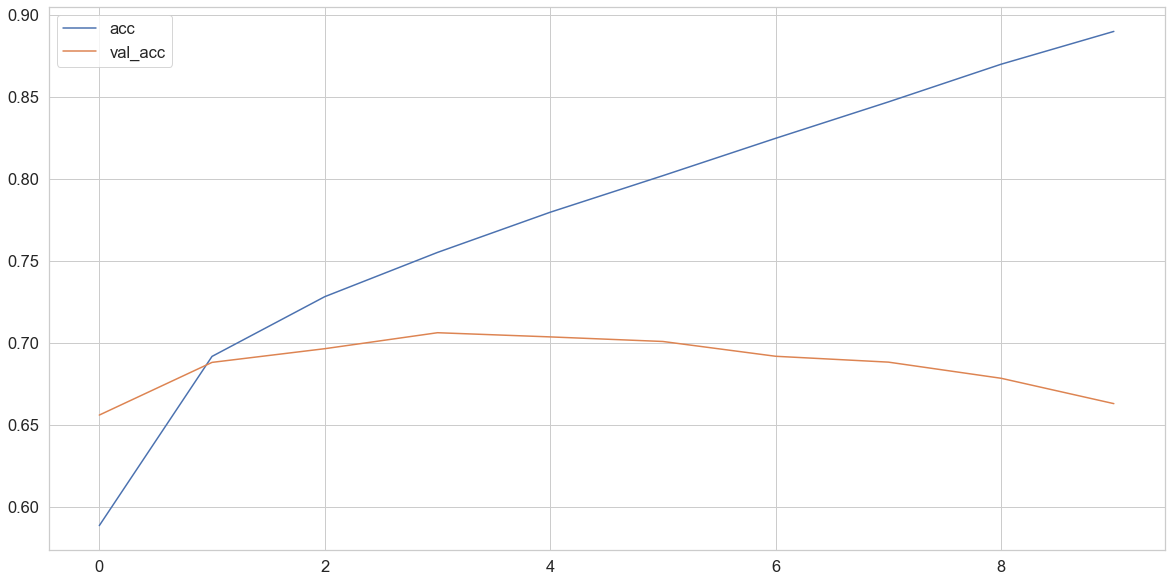

In [43]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [44]:
del model 
tf.keras.backend.clear_session()
gc.collect()

42046

### Test

# Pytorch Lightning

In [45]:
import torch
from torch.nn import functional as F
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.utils import tensorboard

from torchvision import datasets, transforms

from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import Trainer
from torchmetrics.functional.classification.accuracy import accuracy

In [46]:
%load_ext tensorboard

## klasa QuickDrawCNN_PL

- [ ] Zamień dane na Tensory
- [ ] Przekonwertuj dane do formatu NCHW z NHWC
- [ ] Zapewnij odpowiedni typ danych dla etykiet
- [ ] Przygotuj zbiór danych - skorzystaj z `TensorDataset`
- [ ] Zaprojektuj architekturę sieci z minimum 1 warstwą konwolucyjną

In [55]:
X=np.concatenate((data), axis=0)  
print(X.shape)

(1610928, 28, 28)


In [56]:
y=[]
for i in range(len(class_names)):
    Label=[i]
    #print(Label)
    elements=data[i].shape[0]
    #print(elements)
    y=y+Label*elements
y=np.array(y)

In [57]:
print(X.shape)
X=X.reshape(-1,1,28,28)
print(X.shape)

(1610928, 28, 28)
(1610928, 1, 28, 28)


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, stratify=y)   

In [60]:
X_train, X_val = X_train / 255, X_val / 255

In [61]:
print("X_train.shape ",X_train.shape)
print("X_train.dtype ",X_train.dtype)
print("X_val.shape ",X_val.shape)
print("X_val.dtype ",X_val.dtype)
print("y_train.shape ",y_train.shape)
print("y_train.dtype ",y_train.dtype)
print("y_val.shape ",y_val.shape)
print("y_val.dtype ",y_val.dtype)

X_train.shape  (805464, 1, 28, 28)
X_train.dtype  float64
X_val.shape  (805464, 1, 28, 28)
X_val.dtype  float64
y_train.shape  (805464,)
y_train.dtype  int32
y_val.shape  (805464,)
y_val.dtype  int32


In [62]:
X_train=X_train[:100000]
X_val=X_val[:100000]
y_train=y_train[:100000]
y_val=y_val[:100000]

In [63]:
print("X_train.shape ",X_train.shape)
print("X_train.dtype ",X_train.dtype)
print("X_val.shape ",X_val.shape)
print("X_val.dtype ",X_val.dtype)
print("y_train.shape ",y_train.shape)
print("y_train.dtype ",y_train.dtype)
print("y_val.shape ",y_val.shape)
print("y_val.dtype ",y_val.dtype)

X_train.shape  (100000, 1, 28, 28)
X_train.dtype  float64
X_val.shape  (100000, 1, 28, 28)
X_val.dtype  float64
y_train.shape  (100000,)
y_train.dtype  int32
y_val.shape  (100000,)
y_val.dtype  int32


In [64]:
class QuickDrawCNN_PL(LightningModule):
    def __init__(self, X_train,y_train,X_val,y_val):
        super().__init__()
        
        print("X_train.shape ",X_train.shape)
        print("X_train.dtype ",X_train.dtype)
        print("X_val.shape ",X_val.shape)
        print("X_val.dtype ",X_val.dtype)
        print("y_train.shape ",y_train.shape)
        print("y_train.dtype ",y_train.dtype)
        print("y_val.shape ",y_val.shape)
        print("y_val.dtype ",y_val.dtype)
        
        self.X_train= torch.Tensor(X_train)
        self.X_val=torch.Tensor(X_val)
        
        self.y_train=torch.from_numpy(np.array(y_train)).type(torch.LongTensor)
        self.y_val=torch.from_numpy(np.array(y_val)).type(torch.LongTensor)
        
        self.train_dataset = TensorDataset(self.X_train, self.y_train)
        self.val_dataset = TensorDataset(self.X_val, self.y_val)
        
        ####################
        ### Don't chagne ###
        assert type(self.X_train)==torch.Tensor
        assert self.X_train.shape==torch.Size([len(X_train), 1, 28, 28])
        assert self.X_train.dtype==torch.float32, "Typ X_train niepoprawny"
        
        assert type(self.y_train)==torch.Tensor
        assert self.y_train.shape==torch.Size([len(X_train)])
        assert self.y_train.dtype==torch.int64, "Typ y_train niepoprawny"
        
        assert type(self.X_val)==torch.Tensor
        assert self.X_val.shape==torch.Size([len(X_val), 1, 28, 28])
        assert self.X_val.dtype==torch.float32, "Typ X_val niepoprawny"

        assert type(self.y_val)==torch.Tensor
        assert self.y_val.shape==torch.Size([len(y_val)])
        assert self.y_val.dtype==torch.int64, "Typ y_val niepoprawny"
        ### Don't chagne ###
        ####################
        
        self.num_classes = 10
        self.dims = (1, 28, 28)
        channels, width, height = self.dims
        
        self.transform = transforms.Compose([transforms.ToTensor(),])
        
        self.model = nn.Sequential(
            nn.Conv2d(channels, 8, 3),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(15488, self.num_classes),
        )
        
        ####################
        ### Don't chagne ###
        assert any(['Conv2d' in str(_) for _ in self.model]), "Zastosuj przynajmniej jedną warstwę Conv2d"
        assert len([_ for _ in self.model if 'Conv2d' in str(_)])==len([_ for _ in self.model if 'ReLU' in str(_)]), "Po każdej warstwie Conv2d zastosuj funkcję aktywacji ReLU"
        ### Don't chagne ###
        ####################
    def forward(self, x):
        x = self.model(x)
        return F.log_softmax(x, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        # Here we just reuse the validation_step for testing
        return self.validation_step(batch, batch_idx)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=batch_size, num_workers=0)#num_workers=8

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=batch_size, num_workers=0)#num_workers=8

### Trening

- [ ] Uruchom trening na 10 epok
- [ ] Batch size ustaw na wartość np. od 32 do 256 (możesz mniej, możesz więcej)
- [ ] Utwórz instancję klasy QuickDrawCNN_PL
- [ ] Przygotuj `Trainer`
- [ ] Uruchom trening

In [65]:
epochs=10
batch_size=64

In [66]:
model = QuickDrawCNN_PL(X_train, y_train, X_val, y_val)
trainer = Trainer(
    gpus=1,
    max_epochs=10,
)
trainer.fit(model)

X_train.shape  (100000, 1, 28, 28)
X_train.dtype  float64
X_val.shape  (100000, 1, 28, 28)
X_val.dtype  float64
y_train.shape  (100000,)
y_train.dtype  int32
y_val.shape  (100000,)
y_val.dtype  int32
torch.Size([100000]) torch.Size([100000])
<class 'torch.Size'> <class 'torch.Size'>


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 160 K 
-------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.643     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\Mateusz\.conda\envs\dl\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\Mateusz\.conda\envs\dl\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Uruchom TensorBoard do wizualizacji wyników

In [67]:
import tempfile
print(tempfile.gettempdir()+'tensorboard-info')

C:\Users\Mateusz\AppData\Local\Temptensorboard-info


In [68]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir lightning_logs/ (started 1 day, 0:03:27 ago; pid 12644)


In [71]:
!ls -ltrha C:\Users\Mateusz\AppData\Local\Temp\.tensorboard-info
#!rm C:\Users\Mateusz\AppData\Local\Temp\.tensorboard-info

razem 396K
drw-rw-rw-  37 Mateusz 0 392K 2022-07-18 22:06 ..
drw-rw-rw-   2 Mateusz 0 4,0K 2022-07-18 22:06 .


In [72]:
%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir lightning_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [73]:
gc.collect()

66

In [74]:
del model